In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import des données
années : 2013 - 2021

In [4]:
Data=pd.read_csv('./dataset/ENERGIE.csv')
Data.head()

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


***Suppression de colonne(s) hors cadre***


In [5]:
Data.drop(['Unnamed: 0'], axis=1, inplace=True)
Data.head()

,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


# Calcul de nouvelles données

In [6]:
Data.columns

Index(['index', 'Code INSEE région', 'Région', 'An', 'Mois', 'Jour', 'Date',
       'Heure', 'Date - Heure', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)'],
      dtype='object')

In [7]:
Data['Production (MW)'] = Data[['Thermique (MW)',
                                'Nucléaire (MW)', 
                                'Eolien (MW)', 
                                'Solaire (MW)', 
                                'Hydraulique (MW)', 
                                'Bioénergies (MW)']].sum(axis=1)
Data['Production (MW) Renouvelable'] = Data[['Eolien (MW)', 
                                'Solaire (MW)', 
                                'Hydraulique (MW)', 
                                'Bioénergies (MW)']].sum(axis=1)
Data['Production (MW) NON Renouvelable'] = Data[['Thermique (MW)',
                                'Nucléaire (MW)']].sum(axis=1)

***Calcul des MWH correspondant à la demi-heure (0.5h)***

Considérant que la puissance relevée a été constante pendant les 30 dernières minutes

In [8]:
Data['Production (MWH)'] = Data['Production (MW)']*0.5
Data['Consommation (MWH)'] = Data['Consommation (MW)']*0.5

***Calcul de MWH***

In [9]:
Data_CP = Data.groupby(['Région', 'An', 'Mois', 'Jour'])
Data_CP['Région', 'An', 'Mois','Jour', 'Heure', 'Consommation (MW)'].head(12)

<ipython-input-9-843ebfe8654e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_CP['Région', 'An', 'Mois','Jour', 'Heure', 'Consommation (MW)'].head(12)


,Région,An,Mois,Jour,Heure,Consommation (MW)
0,Auvergne-Rhône-Alpes,2013,1,1,00:30,8173.0
1,Auvergne-Rhône-Alpes,2013,1,1,01:00,7944.0
2,Auvergne-Rhône-Alpes,2013,1,1,01:30,7896.0
3,Auvergne-Rhône-Alpes,2013,1,1,02:00,7882.0
4,Auvergne-Rhône-Alpes,2013,1,1,02:30,7909.0
...,...,...,...,...,...,...
1858123,Île-de-France,2021,10,31,03:30,5499.0
1858124,Île-de-France,2021,10,31,04:00,5564.0
1858125,Île-de-France,2021,10,31,04:30,5547.0
1858126,Île-de-France,2021,10,31,05:00,5537.0


In [10]:
Data_CP = Data.groupby(['An', 'Mois']).mean()
Data_CP.reset_index(inplace=True)
Data_CP[Data_CP['An']==2020]

,An,Mois,index,Code INSEE région,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production (MW),Production (MW) Renouvelable,Production (MW) NON Renouvelable,Production (MWH),Consommation (MWH)
84,2020,1,1481183.5,49.916667,16.0,5537.652554,612.035618,4181.595094,466.226591,51.368672,702.051019,-59.680388,95.719366,-511.622312,6108.996360,1315.365647,4793.630712,3054.498180,2768.826277
85,2020,2,1498463.5,49.916667,15.0,5162.337883,455.665110,3969.832735,705.361051,83.043044,750.349198,-82.707555,95.193247,-814.362249,6059.444385,1633.946540,4425.497845,3029.722192,2581.168942
86,2020,3,1515743.5,49.916667,16.0,4624.000280,404.469422,3431.329525,503.934588,111.982807,816.238015,-63.236951,97.476703,-678.156698,5365.431060,1529.632112,3835.798947,2682.715530,2312.000140
87,2020,4,1533311.5,49.916667,15.5,3526.828588,66.094965,3103.129225,263.132755,143.833275,583.381539,-66.136690,94.263368,-660.800000,4253.835127,1084.610938,3169.224190,2126.917564,1763.414294
88,2020,5,1550879.5,49.916667,16.0,3413.332997,134.162466,2766.900986,297.287186,170.783210,744.555892,-69.528898,93.127800,-723.720934,4206.817540,1305.754088,2901.063452,2103.408770,1706.666499
89,2020,6,1568447.5,49.916667,15.5,3542.427315,281.332639,2467.882002,236.572222,167.508970,736.248322,-48.108160,91.886690,-390.713252,3981.430845,1232.216204,2749.214641,1990.715422,1771.213657
90,2020,7,1586015.5,49.916667,16.0,3669.207549,298.982303,2518.394153,235.075381,186.822581,515.871976,-29.634857,92.730959,-148.895553,3847.877352,1030.500896,2817.376456,1923.938676,1834.603775
91,2020,8,1603871.5,49.916667,16.0,3493.404514,283.063228,2560.821741,228.559924,165.407874,411.487735,-46.590838,90.065244,-199.153674,3739.405746,895.520777,2843.884969,1869.702873,1746.702257
92,2020,9,1621439.5,49.916667,15.5,3716.608449,332.482234,2515.442940,247.576620,139.381944,387.571701,-50.706829,86.718634,59.780093,3709.174074,861.248900,2847.925174,1854.587037,1858.304225
93,2020,10,1639007.5,49.916667,16.0,4267.795195,272.609879,3161.093694,482.749160,84.328293,572.464774,-64.139225,82.826725,-323.643145,4656.072525,1222.368952,3433.703573,2328.036262,2133.897597


In [11]:
Data[['Jour', 'Consommation (MW)','Production (MW)', 'Production (MWH)', 'Consommation (MWH)', 'Production (MW) Renouvelable', 'Production (MW) NON Renouvelable']].head()

,Jour,Consommation (MW),Production (MW),Production (MWH),Consommation (MWH),Production (MW) Renouvelable,Production (MW) NON Renouvelable
0,1,8173.0,15725.0,7862.5,4086.5,3404.0,12321.0
1,1,7944.0,15299.0,7649.5,3972.0,3152.0,12147.0
2,1,7896.0,15502.0,7751.0,3948.0,3022.0,12480.0
3,1,7882.0,15351.0,7675.5,3941.0,2826.0,12525.0
4,1,7909.0,15231.0,7615.5,3954.5,2752.0,12479.0


In [12]:
Data.columns

Index(['index', 'Code INSEE région', 'Région', 'An', 'Mois', 'Jour', 'Date',
       'Heure', 'Date - Heure', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Production (MW)', 'Production (MW) Renouvelable',
       'Production (MW) NON Renouvelable', 'Production (MWH)',
       'Consommation (MWH)'],
      dtype='object')

In [13]:
Data_CP = Data.groupby(['Région', 'An', 'Mois', 'Jour']).agg({'Consommation (MWH)' : 'mean', 'Production (MWH)': 'mean'})
Data_CP.reset_index(inplace=True)
Data_CP[Data_CP['An']==2020]

,Région,An,Mois,Jour,Consommation (MWH),Production (MWH)
2556,Auvergne-Rhône-Alpes,2020,1,1,4206.114583,7671.302083
2557,Auvergne-Rhône-Alpes,2020,1,2,4620.114583,8137.437500
2558,Auvergne-Rhône-Alpes,2020,1,3,4527.354167,8108.354167
2559,Auvergne-Rhône-Alpes,2020,1,4,4116.343750,7573.072917
2560,Auvergne-Rhône-Alpes,2020,1,5,4168.427083,7740.145833
...,...,...,...,...,...,...
38403,Île-de-France,2020,12,27,4343.104167,304.541667
38404,Île-de-France,2020,12,28,4719.791667,301.833333
38405,Île-de-France,2020,12,29,4915.656250,278.312500
38406,Île-de-France,2020,12,30,4855.479167,278.812500


In [14]:
Data_CP = Data.groupby(['Région', 'An', 'Mois']).agg({'Consommation (MW)': 'sum', 'Production (MW)': 'sum'})
Data_CP

Consommation (MW)  Production (MW)
Région               An   Mois                                    
Auvergne-Rhône-Alpes 2013 1            14455649.0       26162142.0
                          2            13605248.0       22946108.0
                          3            13293588.0       22224486.0
                          4            10929625.0       21032197.0
                          5            10247670.0       22865734.0
...                                           ...              ...
Île-de-France        2021 6             9069654.0         276647.0
                          7             8785177.0         311602.0
                          8             7985234.0         240547.0
                          9             9074128.0         312417.0
                          10           10948197.0         405426.0

[1272 rows x 2 columns]

# Datasets


In [15]:
# AN
Data_An = Data.groupby(['An']).sum()
Data_An.reset_index(inplace=True)
Data_An['Ratio Conso/Production'] = Data_An['Consommation (MW)'] / Data_An['Production (MW)']
Data_An['Prod_Export_part'] = Data_An['Ech. physiques (MW)'].abs() / Data_An['Production (MW)']
Data_An['Conso_Import_part'] = Data_An['Ech. physiques (MW)'].abs() / Data_An['Consommation (MW)']

# AN , MOIS
Data_MOIS = Data.groupby(['An', 'Mois']).sum()
Data_MOIS.reset_index(inplace=True)
Data_MOIS['Ratio Conso/Production'] = Data_MOIS['Consommation (MW)'] / Data_MOIS['Production (MW)']

#REGION
Data_REGION = Data.groupby(['Région']).sum()
Data_REGION.reset_index(inplace=True)
Data_REGION['Ratio Conso/Production'] = Data_REGION['Consommation (MW)'] / Data_REGION['Production (MW)']
Data_REGION['Prod_Export_part'] = Data_REGION['Ech. physiques (MW)'].abs() / Data_REGION['Production (MW)']
Data_REGION['Conso_Import_part'] = Data_REGION['Ech. physiques (MW)'].abs() / Data_REGION['Consommation (MW)']

#REGION, AN
Data_REGAN = Data.groupby(['Région', 'An']).sum()
Data_REGAN.reset_index(inplace=True)
Data_REGAN['Ratio Conso/Production'] = Data_REGAN['Consommation (MW)'] / Data_REGAN['Production (MW)']
Data_REGAN['Prod_Export_part'] = Data_REGAN['Ech. physiques (MW)'].abs() / Data_REGAN['Production (MW)']
Data_REGAN['Conso_Import_part'] = Data_REGAN['Ech. physiques (MW)'].abs() / Data_REGAN['Consommation (MW)']

#REGION, AN, MOIS
Data_REG = Data.groupby(['Région', 'An', 'Mois']).sum()
Data_REG.reset_index(inplace=True)
Data_REG['Ratio Conso/Production'] = Data_REG['Consommation (MW)'] / Data_REG['Production (MW)']
Data_REG['Prod_Export_part'] = Data_REG['Ech. physiques (MW)'].abs() / Data_REG['Production (MW)']
Data_REG['Conso_Import_part'] = Data_REG['Ech. physiques (MW)'].abs() / Data_REG['Consommation (MW)']


Data_An[['Consommation (MW)','Production (MW)', 'Production (MWH)', 'Consommation (MWH)', 'Production (MW) Renouvelable', 'Production (MW) NON Renouvelable']].head()

,Consommation (MW),Production (MW),Production (MWH),Consommation (MWH),Production (MW) Renouvelable,Production (MW) NON Renouvelable
0,984134263.0,1.096116e+09,548058186.5,492067131.5,202049246.0,894067127.0
1,924697156.0,1.076431e+09,538215434.5,462348578.0,195497719.0,880933150.0
2,946305720.0,1.089257e+09,544628417.5,473152860.0,189633143.0,899623692.0
3,960630996.0,1.058694e+09,529347104.5,480315498.0,202497827.0,856196382.0
4,958089446.0,1.054366e+09,527183210.0,479044723.0,191086673.0,863279747.0


# DashBoard

***Production (MW) - Consommation (MW) - Ratio Consommation/Production***

/ an

/ mois

/ région / an

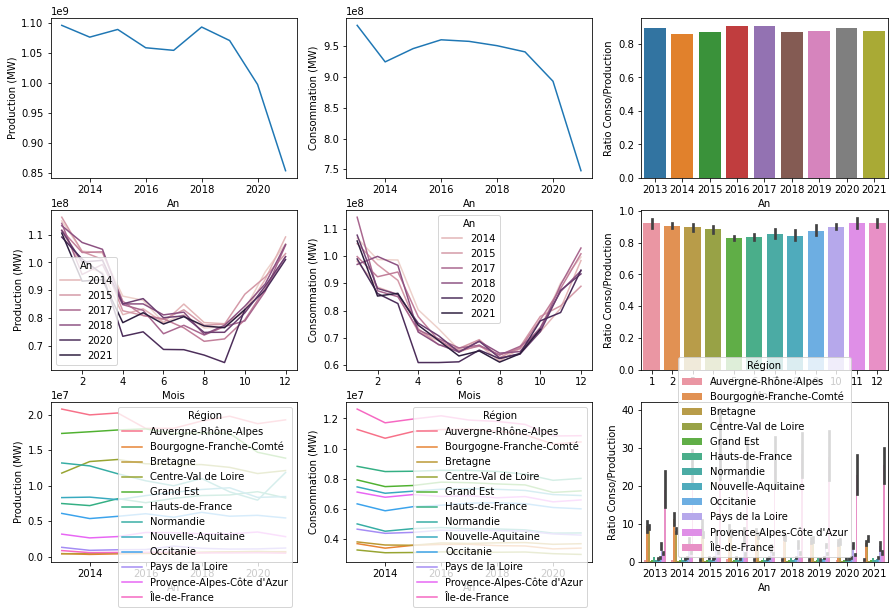

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10));

#Line 1
sns.lineplot(data=Data_An, x='An', y='Production (MW)', ci=None, ax=axes[0,0]);
sns.lineplot(data=Data_An, x='An', y='Consommation (MW)', ci=None, ax=axes[0,1]);
sns.barplot(data = Data_An, x = 'An', y = 'Ratio Conso/Production', ax=axes[0,2]);

#Line 2
sns.lineplot(data=Data_MOIS, x='Mois', y='Production (MW)', hue='An', ci=None, ax=axes[1,0]);
sns.lineplot(data=Data_MOIS, x='Mois', y='Consommation (MW)', hue='An', ci=None, ax=axes[1,1]);
sns.barplot(data = Data_MOIS, x = 'Mois', y = 'Ratio Conso/Production', ax=axes[1,2]);

#Line 3
sns.lineplot(data=Data_REG, x='An', y='Production (MW)',  ci=None, hue='Région', ax=axes[2,0]);
sns.lineplot(data=Data_REG, x='An', y='Consommation (MW)',  ci=None, hue='Région', ax=axes[2,1]);
sns.barplot(data = Data_REG, x = 'An', y = 'Ratio Conso/Production', hue='Région', ax=axes[2,2]);


***Part de l'Import dans la Consommation***

/ Région / an

Région "importatrice"

Data_REG['Ech. physiques (MW)']>=0

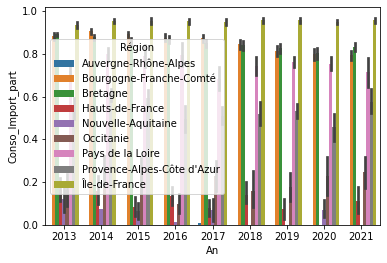

In [17]:
REG_CONSO =Data_REG[Data_REG['Ech. physiques (MW)']>=0]
sns.barplot(x="An", y="Conso_Import_part", hue='Région', data=REG_CONSO);

***Part de l'Export dans la Production***

/ Région / an

Région "exportatrice"

Data_REG['Ech. physiques (MW)']<0

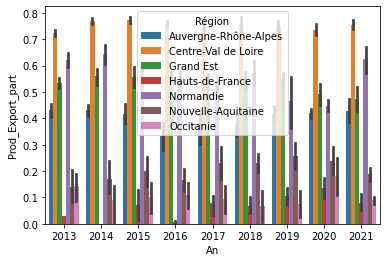

In [18]:
REG_PROD =Data_REG[Data_REG['Ech. physiques (MW)']<0]
sns.barplot(x="An", y="Prod_Export_part", hue='Région', data=REG_PROD);

***Part de l'Import dans la Consommation 2013-2021***

/ Région / 2013-2021

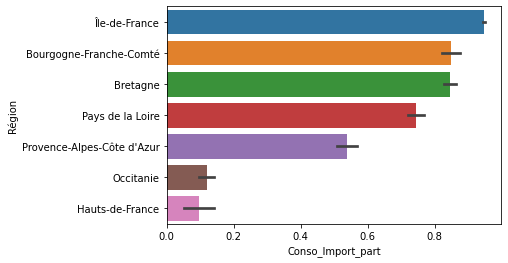

In [19]:
AN_CONSO = Data_REGAN[Data_REGAN['Ech. physiques (MW)']>=0].sort_values("Conso_Import_part", ascending=False)

sns.barplot(x="Conso_Import_part", y="Région", data=AN_CONSO);

***Part de l'Export dans la Production 2013-2021***

/ Région / 2013-2021

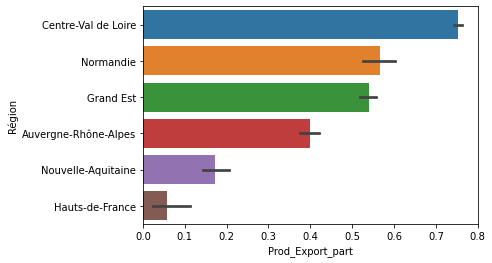

In [20]:
AN_PROD = Data_REGAN[Data_REGAN['Ech. physiques (MW)']<0].sort_values("Conso_Import_part", ascending=False)
sns.barplot(x="Prod_Export_part", y="Région", data=AN_PROD);

***Distribution des Ech. physiques (MW)***

/an / région

On remarque que les Hauts-de-France sont passés d'importateurs à exportateurs

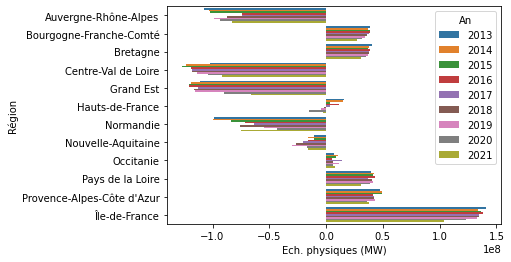

In [21]:
sns.barplot(x="Ech. physiques (MW)", y="Région", hue='An', data=Data_REGAN);

***Régions "importatrices" vs "exportatrices"***

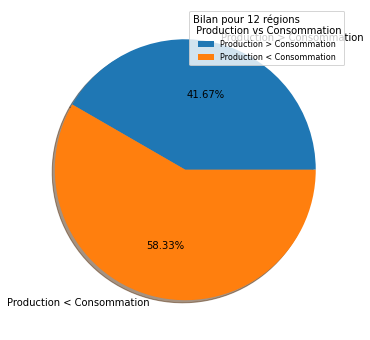

In [22]:
X1 = Data_REGION[Data_REGION['Ech. physiques (MW)']<0]['Région'].count()
X2 = Data_REGION[Data_REGION['Ech. physiques (MW)']>=0]['Région'].count()
plt.figure( figsize= (6,6) )
x=[X1, X2]
plt.pie(x, 
        labels = ['Production > Consommation', 'Production < Consommation'],
       autopct = lambda x: str(round(x, 2)) + '%',
        labeldistance = 1.05,
        shadow = True)
plt.legend(loc = 'best', prop = {'size': 8}, title = 'Bilan pour 12 régions \n Production vs Consommation', title_fontsize = 10, ncol = 1);

***Mix annuel***

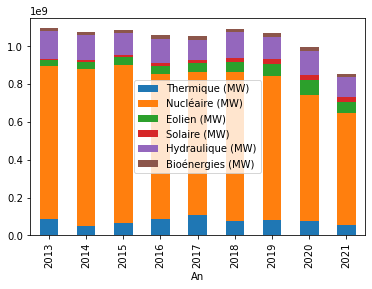

In [23]:
Data_An.plot.bar(x = 'An', 
                 y=['Thermique (MW)',
                    'Nucléaire (MW)', 
                    'Eolien (MW)', 
                    'Solaire (MW)', 
                    'Hydraulique (MW)', 
                    'Bioénergies (MW)'],
                 stacked=True);

***Inversion de consommation vs prodution dans les Hauts-de-France en 2018***

"\nsns.barplot(data = Data_Focus, x='An', y='Production (MW)', alpha=0.5, ax=ax2)\nData_Focus.plot.bar(x = 'An', \n                 y=['Thermique (MW)',\n                    'Nucléaire (MW)', \n                    'Eolien (MW)', \n                    'Solaire (MW)', \n                    'Hydraulique (MW)', \n                    'Bioénergies (MW)'],\n                 stacked=True,\n                   alpha=0.5, ax=ax2)\n"

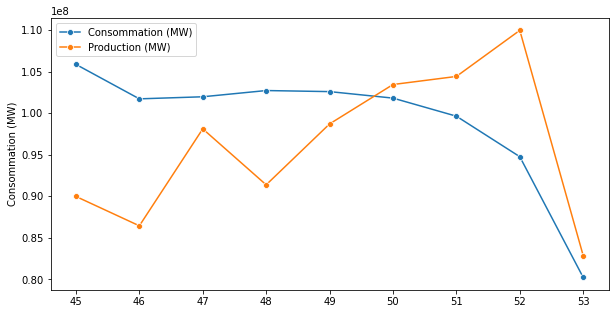

In [24]:
Data_Focus = Data_REGAN[Data_REGAN['Région']=='Hauts-de-France']

fig, ax1 = plt.subplots(figsize=(10, 5));

sns.lineplot(data = Data_Focus['Consommation (MW)'], marker='o', sort = False);
sns.lineplot(data = Data_Focus['Production (MW)'], marker='o', sort = False);
plt.legend(labels=['Consommation (MW)','Production (MW)'])


"""
sns.barplot(data = Data_Focus, x='An', y='Production (MW)', alpha=0.5, ax=ax2)
Data_Focus.plot.bar(x = 'An', 
                 y=['Thermique (MW)',
                    'Nucléaire (MW)', 
                    'Eolien (MW)', 
                    'Solaire (MW)', 
                    'Hydraulique (MW)', 
                    'Bioénergies (MW)'],
                 stacked=True,
                   alpha=0.5, ax=ax2)
"""






***Evolution de la part de production Renouvelable vs non renouvelable***

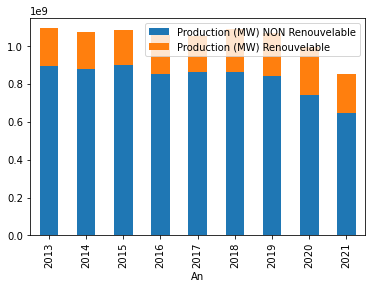

In [25]:
Data_An.plot.bar(x = 'An', 
                 y=['Production (MW) NON Renouvelable', 
                    'Production (MW) Renouvelable'],
                 stacked=True);

***Production spécifique face à la production totale***

(0.0, 1118038700.46)

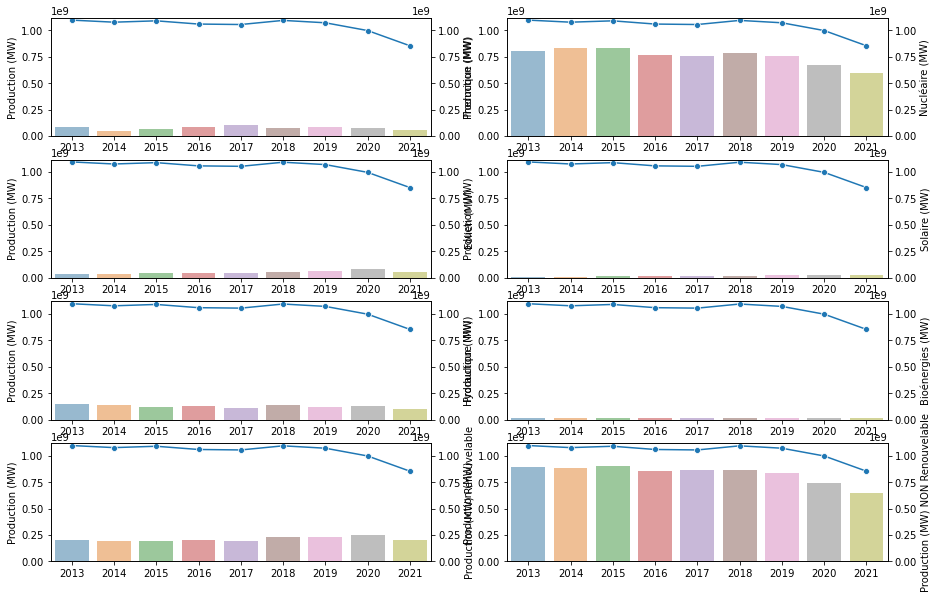

In [26]:
fig, ax1 = plt.subplots(4,2, figsize=(15, 10));
ax2 = ax1
#Ancre de mise à l'échelle commune Y1 vs Y2
TOP = Data_An['Production (MW)'].max()*1.02

#Line 1
sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[0,0])
ax1[0,0].set_ylim(0, TOP)
ax2[0,0] = ax1[0,0].twinx()
sns.barplot(data = Data_An, x='An', y='Thermique (MW)', alpha=0.5, ax=ax2[0,0])
ax2[0,0].set_ylim(0, TOP)

sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[0,1]);
ax1[0,1].set_ylim(0, TOP)
ax2[0,1] = ax1[0,1].twinx()
sns.barplot(data = Data_An, x='An', y='Nucléaire (MW)', alpha=0.5, ax=ax2[0,1]);
ax2[0,1].set_ylim(0, TOP)

#Line 2
sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[1,0]);
ax1[1,0].set_ylim(0, TOP)
ax2[1,0] = ax1[1,0].twinx()
sns.barplot(data = Data_An, x='An', y='Eolien (MW)', alpha=0.5, ax=ax2[1,0]);
ax2[1,0].set_ylim(0, TOP)

sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[1,1]);
ax1[1,1].set_ylim(0, TOP)
ax2[1,1] = ax1[1,1].twinx()
sns.barplot(data = Data_An, x='An', y='Solaire (MW)', alpha=0.5, ax=ax2[1,1]);
ax2[1,1].set_ylim(0, TOP)

#Line 3
sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[2,0]);
ax1[2,0].set_ylim(0, TOP)
ax2[2,0] = ax1[2,0].twinx()
sns.barplot(data = Data_An, x='An', y='Hydraulique (MW)', alpha=0.5, ax=ax2[2,0]);
ax2[2,0].set_ylim(0, TOP)

sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[2,1]);
ax1[2,1].set_ylim(0, TOP)
ax2[2,1] = ax1[2,1].twinx()
sns.barplot(data = Data_An, x='An', y='Bioénergies (MW)', alpha=0.5, ax=ax2[2,1]);
ax2[2,1].set_ylim(0, TOP)

#Line 4
sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[3,0]);
ax1[3,0].set_ylim(0, TOP)
ax2[3,0] = ax1[3,0].twinx()
sns.barplot(data = Data_An, x='An', y='Production (MW) Renouvelable', alpha=0.5, ax=ax2[3,0]);
ax2[3,0].set_ylim(0, TOP)

sns.lineplot(data = Data_An['Production (MW)'], marker='o', sort = False, ax=ax1[3,1]);
ax1[3,1].set_ylim(0, TOP)
ax2[3,1] = ax1[3,1].twinx()
sns.barplot(data = Data_An, x='An', y='Production (MW) NON Renouvelable', alpha=0.5, ax=ax2[3,1]);
ax2[3,1].set_ylim(0, TOP)
